<a href="https://colab.research.google.com/github/ebolofis/Data-Science-Machine-Learning/blob/main/CAM_DS_C101_Activity_4_2_4_Alternate_Model_Solution_(PCA_MCA_Approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Academic integrity statement**: Learners are reminded not to share the provided model answers with anyone. Distributing these resources undermines the integrity of our educational process and may result in disciplinary action.

## 4.2.5 Activity: Implementing dimensionality reduction alternate approach

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.

## Objective
Apply dimension reduction with PCA (or the appropriate technique) and t-SNE in a real-world context.

## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
1. Implement PCA (or the appropriate technique) and t-SNE for dimensionality reduction.
2. Apply PCA (or the appropriate technique) and t-SNE (with the appropriate distance metric) to real-world data for improved analysis and visualisation.
3. Choose the right number of principal components/factors to balance dimensionality reduction and information retention.
4. Evaluate the limitations of PCA and t-SNE.
5. Apply critical thinking skills to assessing dimensionality reduction techniques.
6. Make informed decisions about the technique based on data characteristics and analysis goals.


## Activity guidance
1. Import the relevant libraries for dimension reduction.
2. Transform and visualise the data with PCA (or the appropriate technique) and t-SNE (with the appropriate distance metric).
3. Visualise the perplexity of the data.
4. Combine PCA (or the appropriate technique) and t-SNE and create a final visualisation.
5. Jot down your thoughts on the accuracy of predicting selling price based on the specifications of automobiles.

## Alternative dimensionality reduction approaches

In this notebook, we will explore an alternative dimensionality reduction technique for handling mixed data: PCA + MCA Combination technique. While FAMD is recommended for its ease of use and built-in support for both numeric and categorical variables, this additional approach offers a different perspective and may still yield meaningful insights. By comparing it with FAMD, we can determine which method is most effective for our automobile data set.

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder)
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import the automobiles.csv file (data set) from GitHub with a URL.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"

In [ ]:
# Read the data.
df = pd.read_csv(url)

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Check the data types in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Remove the target column.
y = df['price']
df = df.drop('price', axis=1)

In [ ]:
# Retrieve a list of all columns.
all_columns = df.columns.tolist()

# Identify numeric columns (including integer and float types).
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Note that categorical columns are those that are not numeric.
categorical_columns = list(set(all_columns) - set(numeric_columns))

In [ ]:
# Print the number of unique values for each categorical column.
for col in categorical_columns:
    num_unique_values = df[col].nunique()
    print(f"Number of unique values for '{col}': {num_unique_values}")

Number of unique values for 'carbody': 5
Number of unique values for 'fueltype': 2
Number of unique values for 'cylindernumber': 7
Number of unique values for 'fuelsystem': 8
Number of unique values for 'enginelocation': 2
Number of unique values for 'aspiration': 2
Number of unique values for 'CarName': 147
Number of unique values for 'enginetype': 7
Number of unique values for 'doornumber': 2
Number of unique values for 'drivewheel': 3


Note:- The 'CarName' feature has high cardinality (147 unique values) compared to the total sample size of 205. This makes it a possible candidate for dropping, especially if it does not add much value. One-hot encoding this feature would add 147 new columns, significantly inflating the dimensionality and complexity of the dataset. Under these circumstances it would be preferable to drop the feature altogether.


In [ ]:
# Drop 'CarName' feature.
df.drop('CarName', axis=1, inplace=True)

# Drop 'car_ID' since this is not a useful feature.
df.drop('car_ID', axis=1, inplace=True)

# Apply ordinal encoding for 'cylindernumber'.
cylinder_mapping = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
    'eight': 8, 'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# Apply ordinal encoding for 'doornumber'.
door_mapping = {'two': 2, 'four': 4}
df['doornumber'] = df['doornumber'].map(door_mapping)

# Use one-hot encoding for the remaining categorical columns.
categorical_columns = [
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
    'enginetype', 'fuelsystem'
]

df_original = df.copy()
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Print the first few rows to check the encoded data.
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| symboling   | doornumber   | wheelbase   | carlength   | carwidth   | carheight   | curbweight   | cylindernumber   | enginesize   | boreratio   | stroke   | compressionratio   | horsepower   | peakrpm   | citympg   | highwaympg   | fueltype_gas   | aspiration_turbo   | carbody_hardtop   | carbody_hatchback   | carbody_sedan   | carbody_wagon   | drivewheel_fwd   | drivewheel_rwd   | enginelocation_rear   | enginetype_dohcv   | enginetype_l   | enginetype_ohc   | enginetype_ohcf   | enginetype_ohcv   | enginetype_rotor   | fuelsystem_2bbl   | fuelsystem_4bbl   | fuelsystem_idi   | fuelsystem_mfi   | fuelsystem_mpfi   | fuelsystem_spdi   | fuelsystem_spfi   |
|:------------|:-------------|:------------|:------------|:-----------|:------------|:-------------|:-----------------|:-------------|:------------|:---------|:-------------------|:-------------|:----------|:----------|:-------------|:---------------|:-------------------|:------------------|:--------------------|:----------------

In [ ]:
df.shape

(205, 38)

In [ ]:
# Check for Boolean columns.
bool_columns = df.select_dtypes(include=['bool']).columns

# Convert Boolean columns to integers.
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
# Select numerical features for scaling (numeric features + ordinal features).
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio',
                      'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling', 'doornumber', 'cylindernumber']

# Identify the categorical columns by excluding numerical features.
categorical_features = [col for col in df.columns if col not in numerical_features]

In [ ]:
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'symboling',
 'doornumber',
 'cylindernumber']

In [ ]:
categorical_features

['fueltype_gas',
 'aspiration_turbo',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

## Feature scaling

In [ ]:
# Create a StandardScaler object.
scaler = StandardScaler()

# Fit and transform the numerical features.
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,...,0,1,0,0,0,0,0,1,0,0
3,0.938490,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Create separate DataFrames for numerical features. This will be convenient while performing PCA and MCA.
df_numerical = df.drop(categorical_features, axis=1)
df_categorical = df.drop(numerical_features, axis=1)

In [ ]:
df_numerical.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [ ]:
df_categorical.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# PCA

In [ ]:
# Apply PCA.
def apply_pca(df, n_components=None):
  pca = PCA(n_components)
  X_pca = pca.fit_transform(df)
  df_pca = pd.DataFrame({
    'PC': range(1, len(pca.explained_variance_ratio_) + 1),
    'Explained Variance': pca.explained_variance_ratio_
  })

  return X_pca, df_pca, pca

### Trial run: Perform PCA without reducing the number of features

* In this case, no information will be lost because the number of principal components equals the number of original features.
* When the number of principal components is less than the number of original features, some degree of information will be lost.

In [ ]:
pca_components, df_pca, pca = apply_pca(df_numerical, 16)

In [ ]:
print(df_pca.to_string(index=False))

 PC  Explained Variance
  1            0.448785
  2            0.190142
  3            0.089305
  4            0.061938
  5            0.056565
  6            0.038158
  7            0.030507
  8            0.022937
  9            0.020567
 10            0.015924
 11            0.007983
 12            0.006224
 13            0.004653
 14            0.003529
 15            0.001602
 16            0.001182


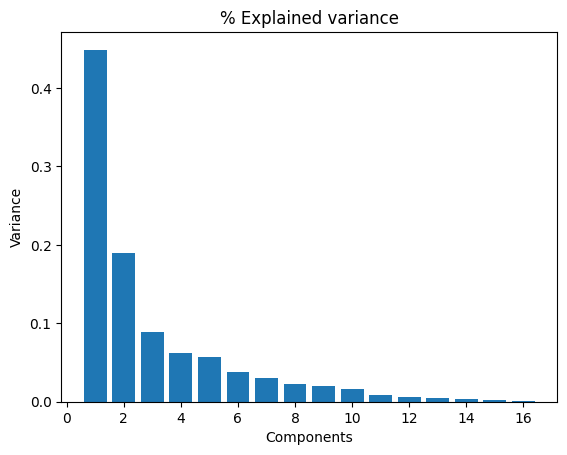

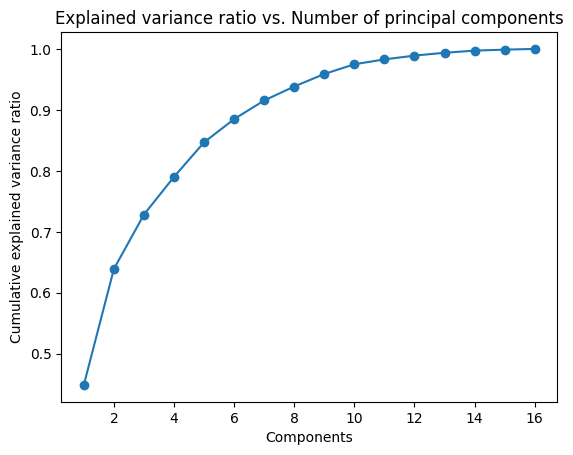

In [ ]:
# Plot explained variance ratio.
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)


plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Components')
plt.ylabel('Variance')
plt.title('% Explained variance')
plt.show()


plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Explained variance ratio vs. Number of principal components')

# plt.ylim(0,1)
plt.show()

# Dimensionality reduction for categorical features

PCA can be used only on numerical data. It is not suitable for reducing the categorical features.

MCA (multiple correspondence analysis) is a technique similar to PCA but suitable for categorical features. MCA is available through the **Prince** package in Python.

Hence, we need to separately apply PCA to the numerical features and MCA to the categorical variables. Finally, we merge the output of the two steps to obtain a data set with an entirely new set of features, which have been derived from the original features.

Unlike RFE/MI, which can be used to reduce the number of **original** features, PCA/MCA is used to create an entirely **new** set of features.

In [ ]:
!pip install prince

In [ ]:
import prince

In [ ]:
# Apply MCA.
def apply_mca(df_cat, n_components=None):
  mca = prince.MCA(
    n_components,
    random_state=42
  )

  # Fit the MCA model.
  mca = mca.fit(df_cat)
  mca_components = mca.transform(df_cat)
  return mca, mca_components

In [ ]:
# Trial run: Extract as many components as there are categorical features.
mca, mca_components = apply_mca(df_categorical, len(df_categorical.columns))

In [ ]:
# Access the percentage of variance explained by each component.
explained_variance = mca.percentage_of_variance_

# Print explained variance for each component.
print("Explained Variance for each component:")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var:.4f}%")


Explained Variance for each component:
Component 1: 15.7394%
Component 2: 12.4297%
Component 3: 9.7280%
Component 4: 7.9048%
Component 5: 7.4535%
Component 6: 6.3614%
Component 7: 5.4766%
Component 8: 4.9768%
Component 9: 4.6452%
Component 10: 4.5699%
Component 11: 4.5253%
Component 12: 3.9511%
Component 13: 3.3298%
Component 14: 2.9028%
Component 15: 2.2771%
Component 16: 1.7185%
Component 17: 0.6783%
Component 18: 0.5247%
Component 19: 0.3523%
Component 20: 0.2769%
Component 21: 0.1778%
Component 22: 0.0000%


In [ ]:
# Visualise all the components along with their respective variance using a scree plot.
# Note: The components are not arranged in descending order of variance. Instead, the groupings correspond to the one-hot encoded features derived from each categorical variable.

mca.scree_plot()

alt.Chart(...)

In [ ]:
# Concatenate MCA components with PCA components.
def merge_pca_mca(X_pca, mca_components):
  merged_data = np.hstack((X_pca, mca_components))

  # Convert the merged data back into a DataFrame.
  merged_df = pd.DataFrame(
    merged_data,
    columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])] +
            [f'MCA_{i+1}' for i in range(mca_components.shape[1])],
    index=df.index  # Use the original DataFrame's index.
  )
  return merged_df

In [ ]:
# Evaluate the model's performance using all the numerical and categorical features.
# Note: These features have been transformed using PCA and MCA, but the total
# number of features after transformation has been kept the same as the original
# number of features (post the one-hot encoding step).

# Specify number of components = number of categorical features in the original data.
mca, mca_components = apply_mca(df_categorical, len(df_categorical.columns))

# Specify number of principal components = number of numerical features in the original data.
pca_components, df_pca, pca = apply_pca(df_numerical, 16)

# Merge the output of PCA and MCA.
merged_df_all_data = merge_pca_mca(pca_components, mca_components)

In [ ]:
# Check the merged DataFrame.
merged_df_all_data.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,MCA_13,MCA_14,MCA_15,MCA_16,MCA_17,MCA_18,MCA_19,MCA_20,MCA_21,MCA_22
0,-1.081687,-2.839408,0.004098,-1.924153,-1.308493,-0.278081,-0.382746,1.076772,-0.212881,-0.579013,...,-0.074269,-0.115924,-0.013859,0.139295,0.140970,-0.260956,-0.000303,0.032829,0.206944,0.960613
1,-1.081687,-2.839408,0.004098,-1.924153,-1.308493,-0.278081,-0.382746,1.076772,-0.212881,-0.579013,...,-0.074269,-0.115924,-0.013859,0.139295,0.140970,-0.260956,-0.000303,0.032829,0.206944,0.960613
2,0.491608,-1.898648,1.128536,0.388182,1.910887,0.379961,1.445346,0.561436,-0.199184,-1.454268,...,0.037604,-0.099028,0.125521,0.000548,-0.046994,0.047263,-0.013063,-0.006493,-0.027093,0.960613
3,-0.306722,-0.026172,-0.449402,1.094019,-0.147103,0.614794,0.047533,0.879195,0.536431,0.544674,...,-0.150599,0.177295,-0.032604,0.011360,-0.008327,0.022243,-0.035180,0.006714,-0.005883,0.960613
4,1.201240,-0.970379,-0.699970,1.011494,0.358033,0.432911,0.523177,1.205639,0.695242,-0.108174,...,-0.082850,-0.026755,-0.021484,0.044627,-0.056818,0.089031,-0.006452,0.288466,-0.006386,0.960613


In [ ]:
def run_linear_model(df,y):
  # Add a constant column to include the intercept in OLS.
  X_const = sm.add_constant(df)

  # Fit the OLS model.
  ols_model = sm.OLS(y, X_const).fit()

  # Extract adjusted R-squared.
  adjusted_r_squared = ols_model.rsquared_adj

  # Print(f"R-squared: {r_squared:.4f}").
  print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")

In [ ]:
# Check the benchmark, which is based on the original data set.
run_linear_model(df,y)

Adjusted R-squared: 0.9083


In [ ]:
# Check model peformance on the transformed data.
run_linear_model(merged_df_all_data,y)

Adjusted R-squared: 0.9083


0.9083 is the model performance with 16 numerical features and 22 categorical features. Although the features have been transformed using PCA and MCA respectively, the total number of features (38) have not been reduced yet.

We see that the baseline data (full data set without applying PCA and MCA) and the transformed data (PCA + MCA) without any dimensionality reduction returned identical model performance. This indicates that no information has been lost in the transformation.

# Reduce the number of features

In [ ]:
# Transform the data using PCA and MCA. Specify 5 numerical features and 5 categorical features

mca, mca_components = apply_mca(df_categorical, 5)

pca_components, df_pca, pca = apply_pca(df_numerical, 5)

# Merge the output of PCA and MCA.
merged_df_10_features = merge_pca_mca(pca_components, mca_components)

In [ ]:
# Run the linear regression model on the reduced data.
run_linear_model(merged_df_10_features,y)

Adjusted R-squared: 0.8181


Now, we see a signficant degaradation in the model performance when the number of features was reduced from 38 to 10.

In [ ]:
# Reduce the number of categorical features from 22 to 3.
mca, mca_components = apply_mca(df[categorical_features], 3)

# Reduce the number of numerical features from 16 to 3.
pca_components, df_pca, pca = apply_pca(df_numerical, 3)

merged_df_6_features = merge_pca_mca(pca_components, mca_components)

run_linear_model(merged_df_6_features,y)

Adjusted R-squared: 0.7863


We observe a further drop in model performance after reducing the number of
categorical features from 5 to 3 and the number of numerical features from 5 to 3.

The reduction in model performance requires careful consideration to determine if it is an acceptable trade-off for achieving a smaller feature set.

In our example, the data set is relatively small, so the impact of computational intensity is not immediately apparent. However, with larger, industry-standard data sets, this impact becomes significantly more pronounced. This leads to slower processing times. The trade-off between model performance and computational efficiency might be justifiable in such scenarios.

While reducing features, it is recommended that you monitor how it might impact model performance, which is typically the next downstream activity. This is only possible in cases where the target variable is available. In unsupervised problems, we will not be able to use mutual information (MI), recursive feature elimination (RFE), or ordinary least squares (OLS) to evaluate how feature reduction impacts model performance.

In [ ]:
def calculate_mi(df, y):
  # Calculate MI for all features.
  mi_scores = mutual_info_regression(df, y, random_state=42)
  mi_df = pd.DataFrame({'Feature': df.columns, 'MI Score': mi_scores})

  # Sort features by MI score in descending order.
  mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

  return mi_df

In [ ]:
# Consider the importance of features in the merged data set. We are using the transformed data, which contains 38 features.
calculate_mi(merged_df_all_data, y)

,Feature,MI Score
0,PC_1,9.136275e-01
1,MCA_1,4.833014e-01
2,MCA_16,3.554470e-01
3,MCA_15,3.530766e-01
4,MCA_20,3.410681e-01
5,MCA_17,3.395119e-01
6,MCA_14,3.285096e-01
7,PC_2,3.134920e-01
8,MCA_4,3.011238e-01
9,MCA_18,2.920662e-01


# t-SNE

We previously discussed that PCA is not suitable for categorical variables.

t-SNE relies on a distance metric to identify clusters of data. Different kinds of distance metrics exist, with the most common one being the Euclidean metric.

The Euclidean metric, however, may not be ideal for data sets containing categorical features. In cases where mixed data types (both numerical and categorical) are present, a more appropriate choice is the Gower distance. This metric effectively handles both numeric and categorical variables, making it a better fit for mixed data sets. The application of this metric is illustrated in the example below.

In [ ]:
!pip install gower

In [ ]:
import gower

Since the Gower distance is not directly available as an option within the t-SNE package, we can compute the Gower distance separately and use it as a precomputed distance matrix for t-SNE.

Gower distance already handles categorical data natively. So, one-hot encoding of the features is not required before passing in the data to compute the Gower matrix.

Here, we are passing in the original data set (prior to the one-hot encoding step).  

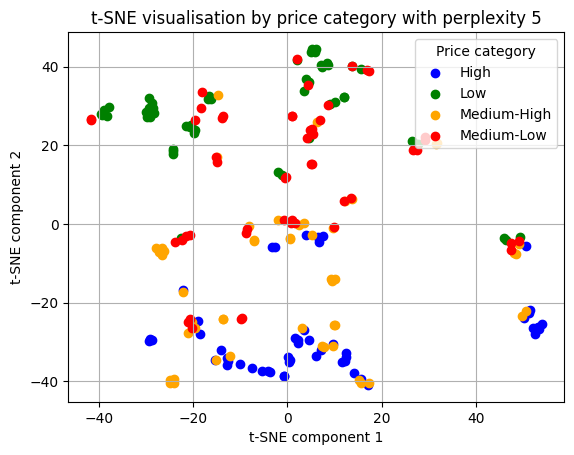

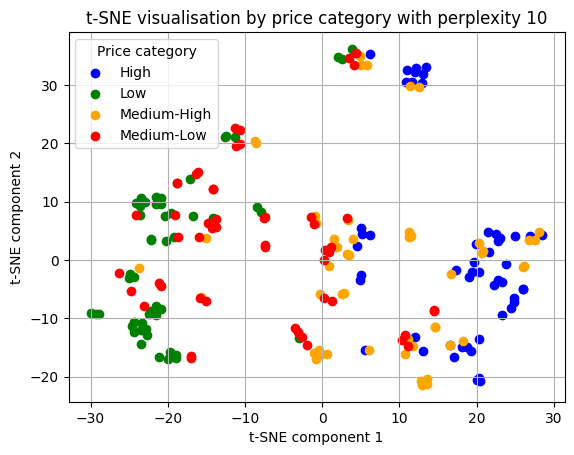

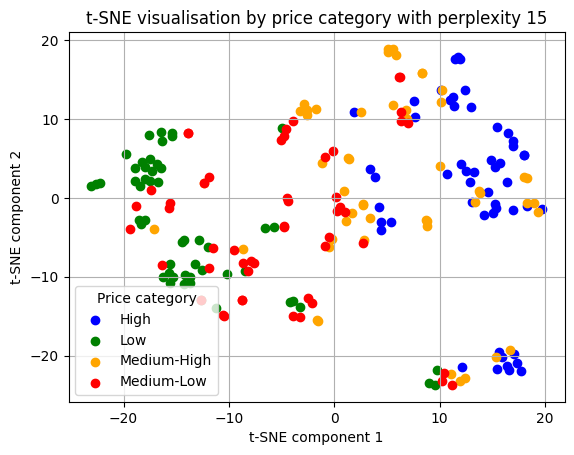

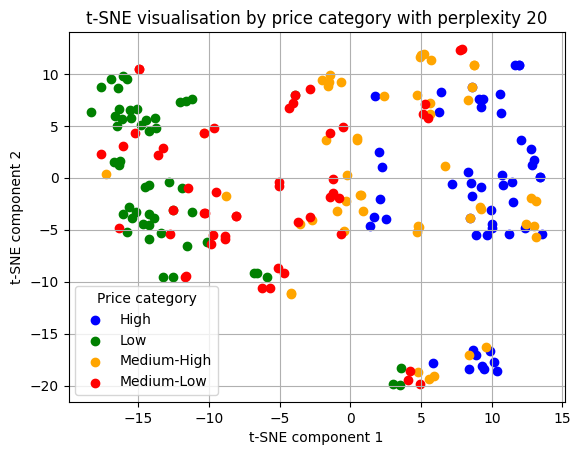

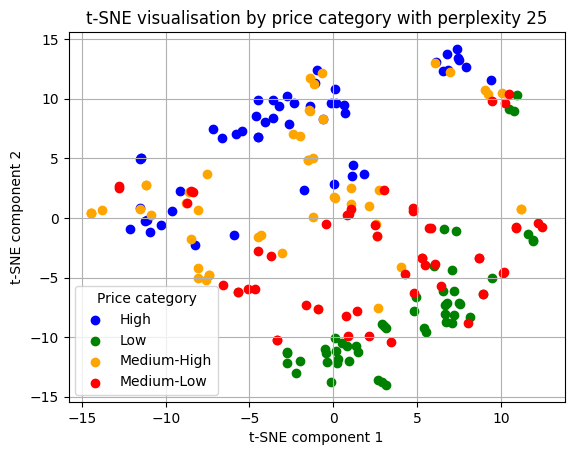

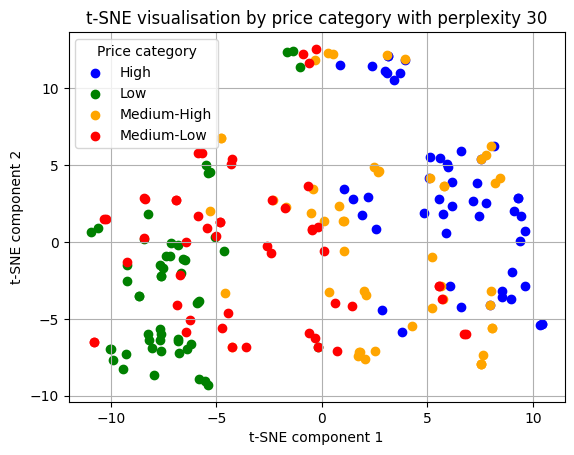

In [ ]:
distance_matrix = gower.gower_matrix(df_original)

# Bin 'price' into quartiles.
price_bins = pd.qcut(y, q=4, labels=["Low", "Medium-Low", "Medium-High", "High"])

# Experiment with different values of perplexity to decide on a suitable value.
for i in range(5, 35, 5):
  # Apply t-SNE with precomputed distance.
  tsne = TSNE(n_components=2, metric='precomputed', perplexity=i, random_state=42, init='random')
  tsne_results = tsne.fit_transform(distance_matrix)

  # Plot t-SNE.
  colors_tsne = ['blue', 'green', 'orange', 'red']  # Note colours for each quartile.
  for color, price_bin in zip(colors_tsne, np.unique(price_bins)):
    indices = price_bins == price_bin
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], c=color, label=price_bin)
  plt.xlabel('t-SNE component 1')
  plt.ylabel('t-SNE component 2')
  plt.title(f't-SNE visualisation by price category with perplexity {i}')
  plt.legend(title="Price category")
  plt.grid(True)

  plt.show()

**Note:** t-SNE is computationally intensive, especially for industry-scale data sets with hundreds of features and tens of thousands of rows. In such cases, t-SNE requires significant computation time. However, it is often preferred over PCA for visualising clusters of data in 2D due to its superior ability to preserve local structure.

A common practice to address the computational challenge is to first reduce the dimensionality of the data set from hundreds of features to around 40 to 50 features (or even fewer) using PCA. The reduced data set is then fed into t-SNE, allowing for a clearer and more discernible 2D visualisation of the clusters while significantly reducing computation time.

# PCA + t-SNE

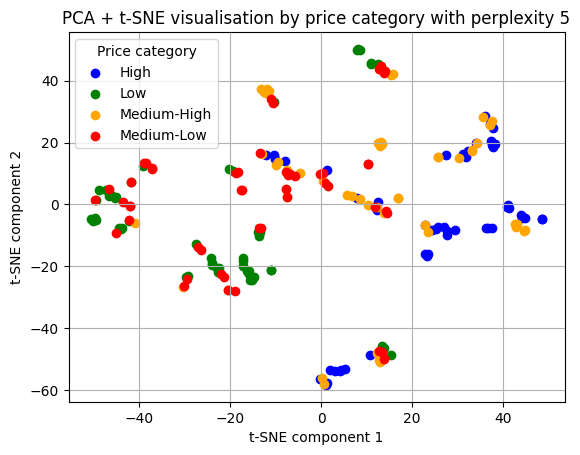

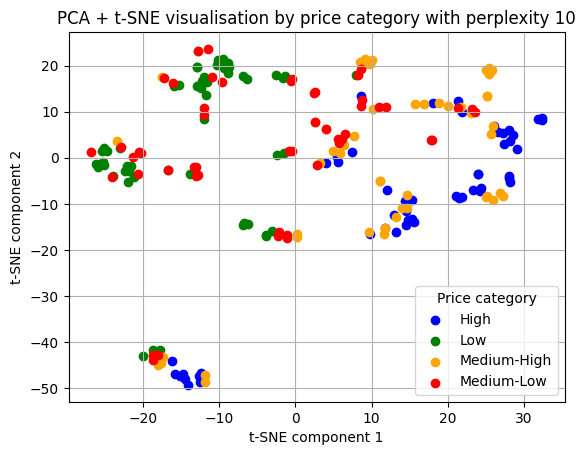

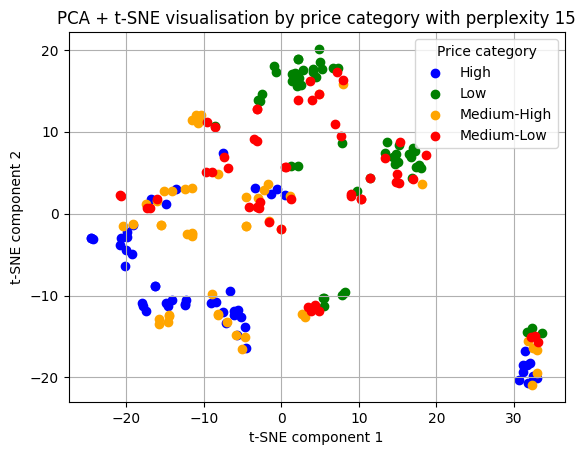

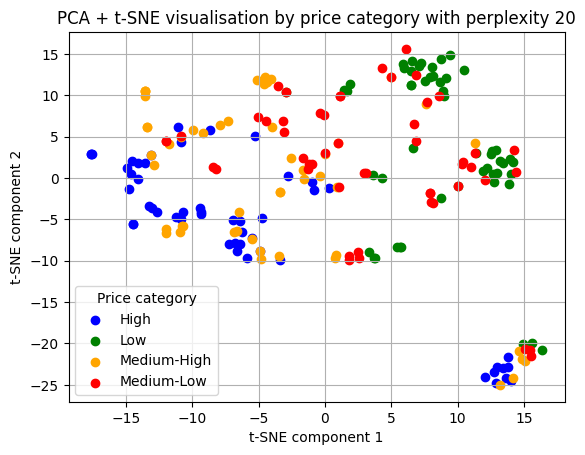

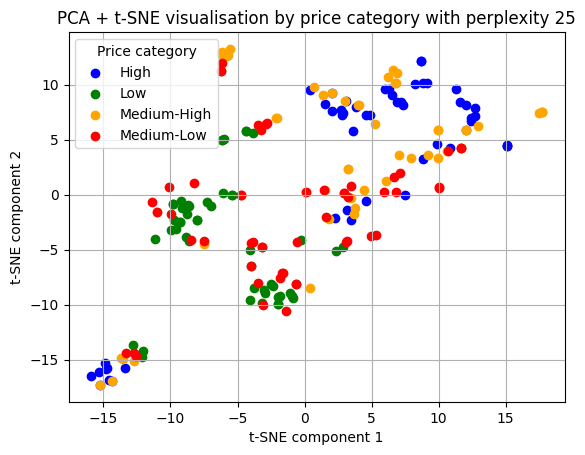

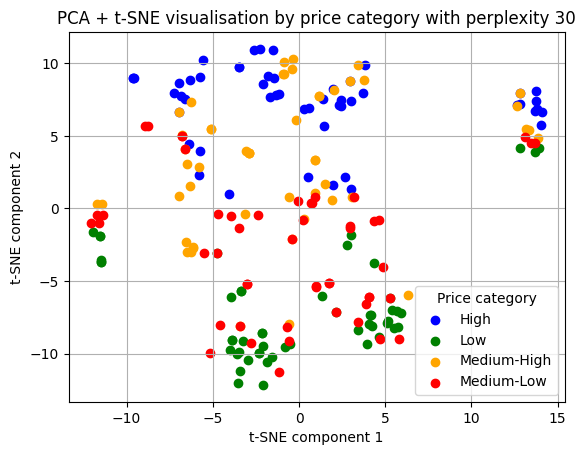

In [ ]:
# Do not use the orignial data set; instead, use the reduced data set obtained after the PCA step.
distance_matrix = gower.gower_matrix(merged_df_10_features)

# Experiment with different values of perplexity to decide on a suitable value.
for i in range(5, 35, 5):
  # Apply t-SNE with precomputed distance.
  tsne = TSNE(n_components=2, metric='precomputed', perplexity=i, random_state=42, init='random')
  tsne_results = tsne.fit_transform(distance_matrix)

  # Plot t-SNE.
  colors_tsne = ['blue', 'green', 'orange', 'red']  # Note colours for each quartile.
  for color, price_bin in zip(colors_tsne, np.unique(price_bins)):
    indices = price_bins == price_bin
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], c=color, label=price_bin)
  plt.xlabel('t-SNE component 1')
  plt.ylabel('t-SNE component 2')
  plt.title(f'PCA + t-SNE visualisation by price category with perplexity {i}')
  plt.legend(title="Price category")
  plt.grid(True)

  plt.show()


This activity explored an alternative technique to FAMD, namely the combination of PCA and MCA for dimensionality reduction.